<a href="https://colab.research.google.com/github/bwowby/DS/blob/master/visualization_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

## Load Data

In [ ]:
url = "https://bit.ly/dsa-04-health"
data = pd.read_csv(url)

#서울시 공공 건강검진 데이터 -> 좀 보기 불편함 (예:성별 1/2)
print(data.shape)
data.head()

(1000, 34)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,465969,1,8,41,170.0,70.0,74.0,0.7,0.7,...,96.0,3.0,NaN,1,NaN,NaN,NaN,NaN,2.0,20171219
1,2016,565871,1,10,41,160.0,60.0,81.0,1.2,1.0,...,14.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,115718,2,11,11,160.0,55.0,71.0,1.0,1.0,...,20.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219
3,2016,767524,1,6,28,180.0,70.0,79.0,1.0,0.9,...,16.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
4,2016,482178,2,9,11,160.0,60.0,85.0,0.8,1.2,...,13.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219


 ## Explore

In [ ]:
#한글 인코딩 등 설정 위해서 필요
import matplotlib
import seaborn as sns
from IPython.display import set_matplotlib_formats

#디폴트로 세틍해 줄 아이들

#window
#matplotlib.rc('font', family='NanumGothic')
matplotlib.rc('font', family='Malgun Gothic')

#Apple
# matplotlib.rc('font', family='AppleGothic')

#Retina : 더 선명하게
set_matplotlib_formats('retina')

#Minus : 마이너스 기호 깨질 때
matplotlib.rc('axes', unicode_minus=False)

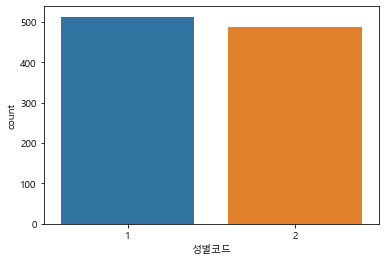

In [ ]:
# 1 남성, 2 여성 한글폰트 꺠짐
sns.countplot(data=data, x="성별코드")

### 사이즈 조절하기

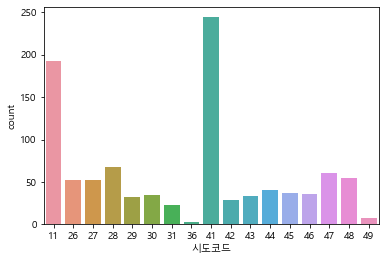

In [ ]:
import matplotlib.pyplot as plt

sns.countplot(data=data, x="시도코드")

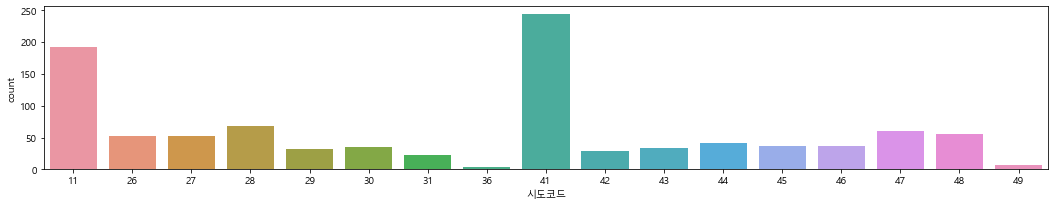

In [ ]:
plt.figure(figsize=(18,3))
sns.countplot(data=data, x="시도코드")

### 여러개 시각화 한번에 띄우기 : 직접적으로 연관없지만 간접적으로 묶어서 시각화 할때

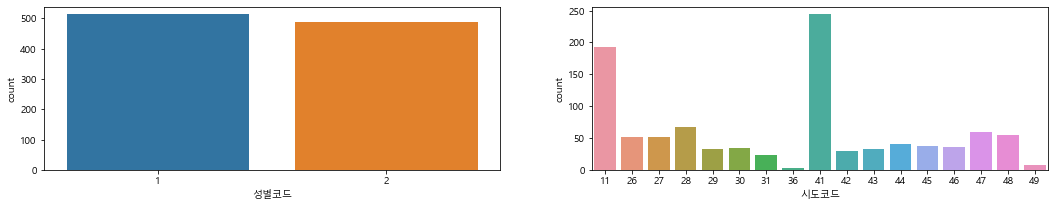

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18,3)

#각각을 ax=ax1,ax2 로 줘서 위치 설정
sns.countplot(data=data, x="성별코드", ax=ax1)
sns.countplot(data=data, x="시도코드", ax=ax2)

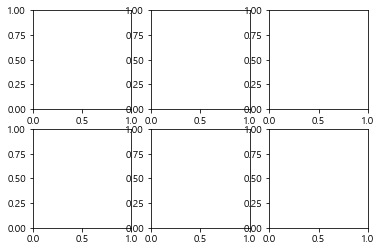

In [ ]:
# figure, ax1 = plt.subplots(nrows=1, ncols=1)
# figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) 
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

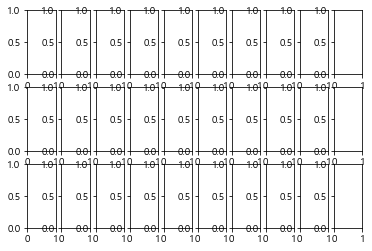

In [ ]:
#엄청 클때는 그냥 axes로 받기
figure, axes = plt.subplots(nrows=3, ncols=10)
#이런식으로 접근 가능
axes[0][1] 

### 컬러 선택하기

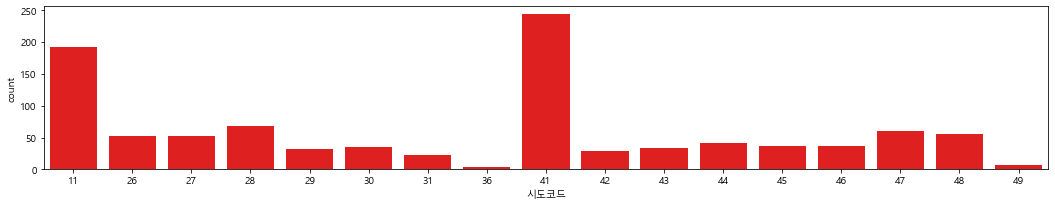

In [ ]:
plt.figure(figsize = (18,3))
sns.countplot(data=data, x="시도코드", color = 'r')

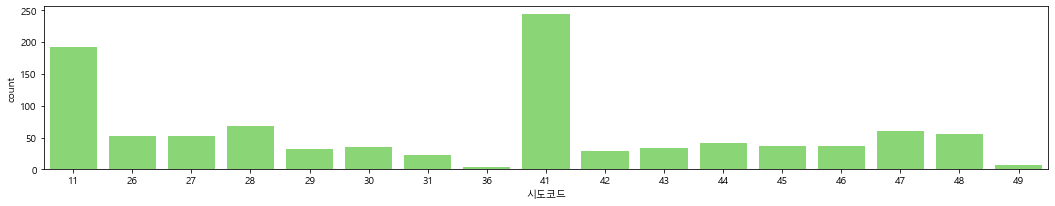

In [ ]:
plt.figure(figsize = (18,3))
sns.countplot(data=data, x="시도코드", color = '#80e666')

### palette

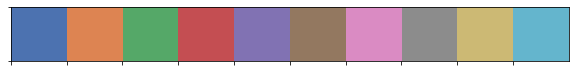

In [ ]:
palette = sns.color_palette('deep', 10)
sns.palplot(palette)

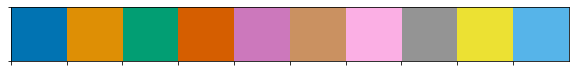

In [ ]:
palette = sns.color_palette('colorblind', 10)
sns.palplot(palette)

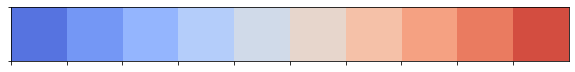

In [ ]:
palette = sns.color_palette('coolwarm', 10)
sns.palplot(palette)

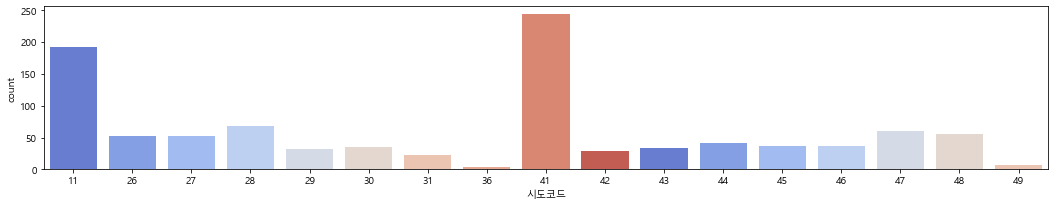

In [ ]:
plt.figure(figsize = (18,3))
sns.countplot(data=data, x="시도코드", palette = palette)

### countplot

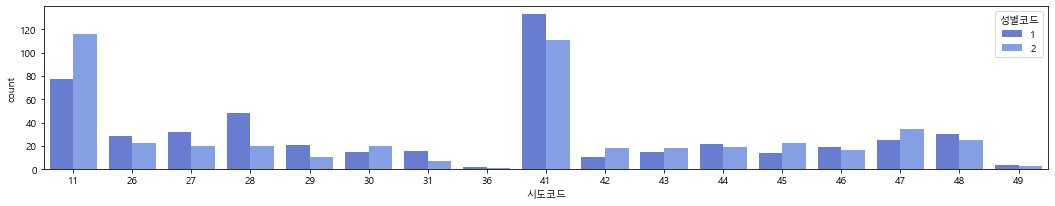

In [ ]:
#hue: 그 기준으로 쪼개서 따로 시각화
plt.figure(figsize=(18,3))
sns.countplot(data=data, x="시도코드", hue="성별코드", palette = palette)

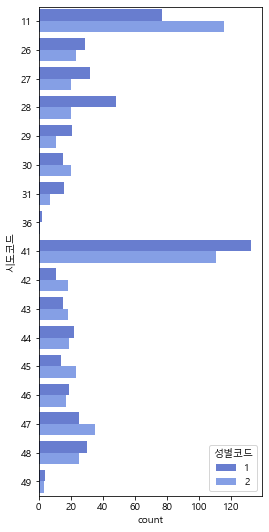

In [ ]:
plt.figure(figsize=(4,9))
sns.countplot(data=data, y="시도코드", hue="성별코드", palette = palette)

#4-7

### distplot

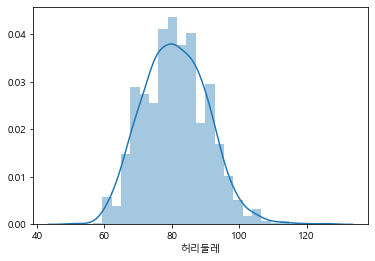

In [ ]:
sns.distplot(data["허리둘레"])

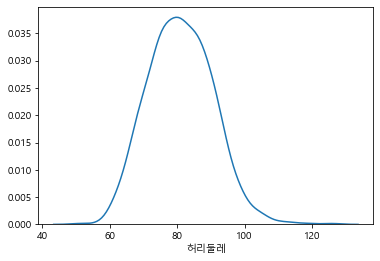

In [ ]:
sns.distplot(data["허리둘레"], hist=False)

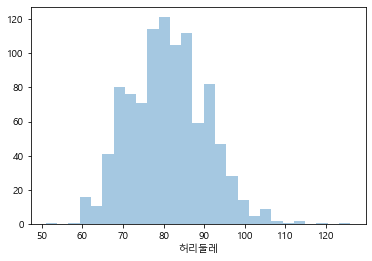

In [ ]:
sns.distplot(data["허리둘레"], kde=False)

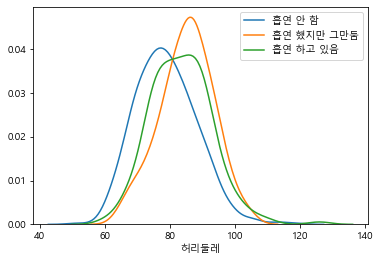

In [ ]:
one = data[data["흡연상태"]==1]
two = data[data["흡연상태"]==2]
three = data[data["흡연상태"]==3]


sns.distplot(one["허리둘레"], hist=False, label="흡연 안 함")
sns.distplot(two["허리둘레"], hist=False, label="흡연 했지만 그만둠")
sns.distplot(three["허리둘레"], hist=False, label="흡연 하고 있음")

#4-8

### barplot
countplot은 y축 지정 못하고 기본으로 count   
barplot은 숫자인 y축 지정 가능

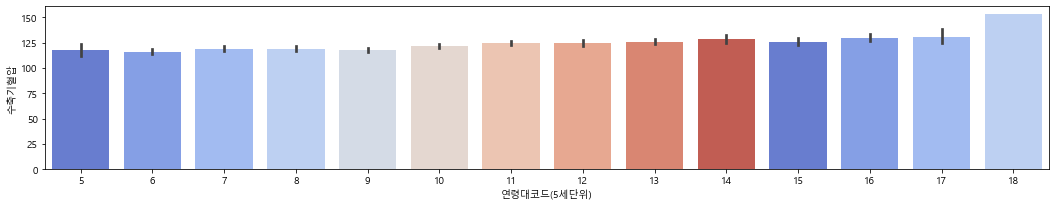

In [ ]:
plt.figure(figsize=(18,3))
sns.barplot(data=data, x="연령대코드(5세단위)", y="수축기혈압", palette = palette)
#신뢰구간 : 신뢰구간 검은바 안에 있으면 outlier 가 아님

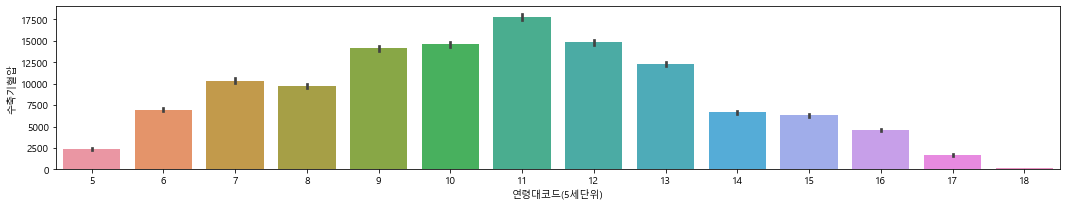

In [ ]:
import numpy as np
plt.figure(figsize=(18,3))
sns.barplot(data=data, x="연령대코드(5세단위)", y="수축기혈압", estimator = np.sum)
#신뢰구간 : 신뢰구간 검은바 안에 있으면 outlier 가 아님
#estimator default : np.mean

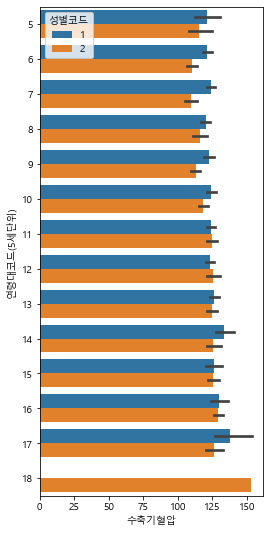

In [ ]:
import numpy as np
plt.figure(figsize=(4,9))
sns.barplot(data=data, y="연령대코드(5세단위)", x="수축기혈압",
            hue="성별코드", orient='h')
#신뢰구간 : 신뢰구간 검은바 안에 있으면 outlier 가 아님
#4-9